<a href="https://colab.research.google.com/github/sudipto291088/Data110-Fall2025/blob/main/Session_7_15thOct_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pg = sns.load_dataset('penguins')

In [ ]:
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
pg.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [11]:
pg.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [13]:
pg.shape

(344, 7)

In [17]:
print(list(pg.columns))

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


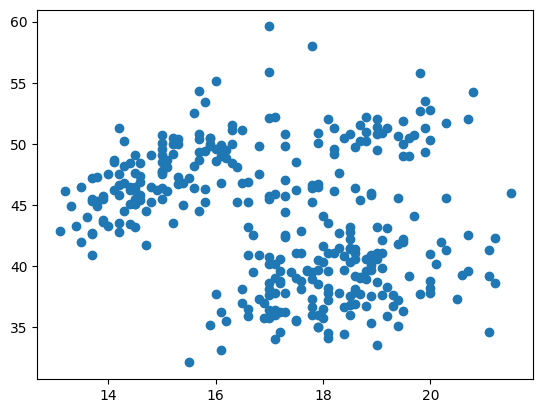

In [14]:
plt.scatter(pg['bill_depth_mm'],pg['bill_length_mm'])

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

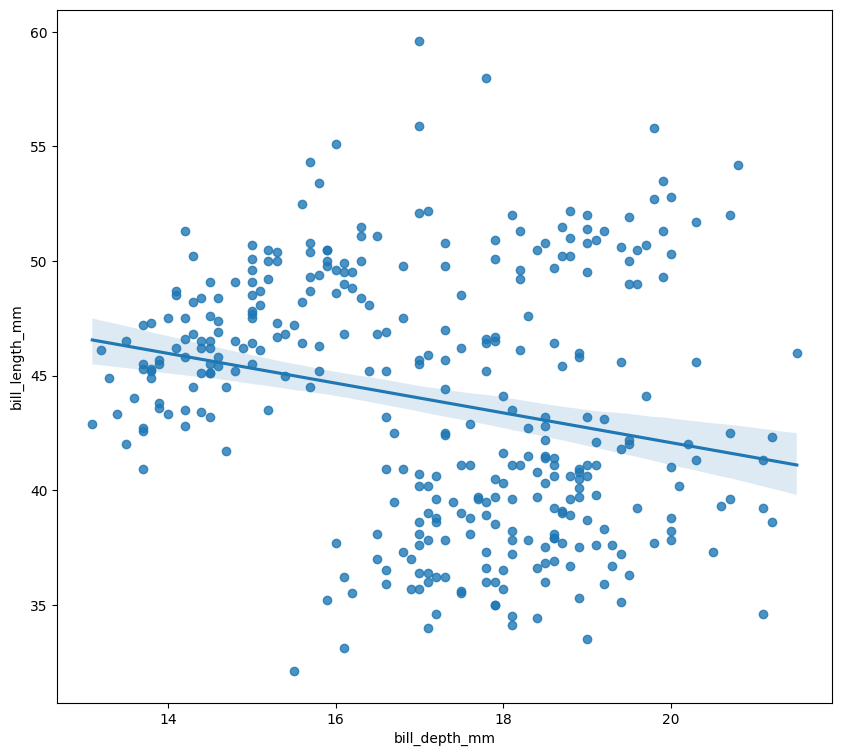

In [24]:
plt.figure(figsize=(10,9))
sns.regplot(x='bill_depth_mm',y='bill_length_mm',data=pg)

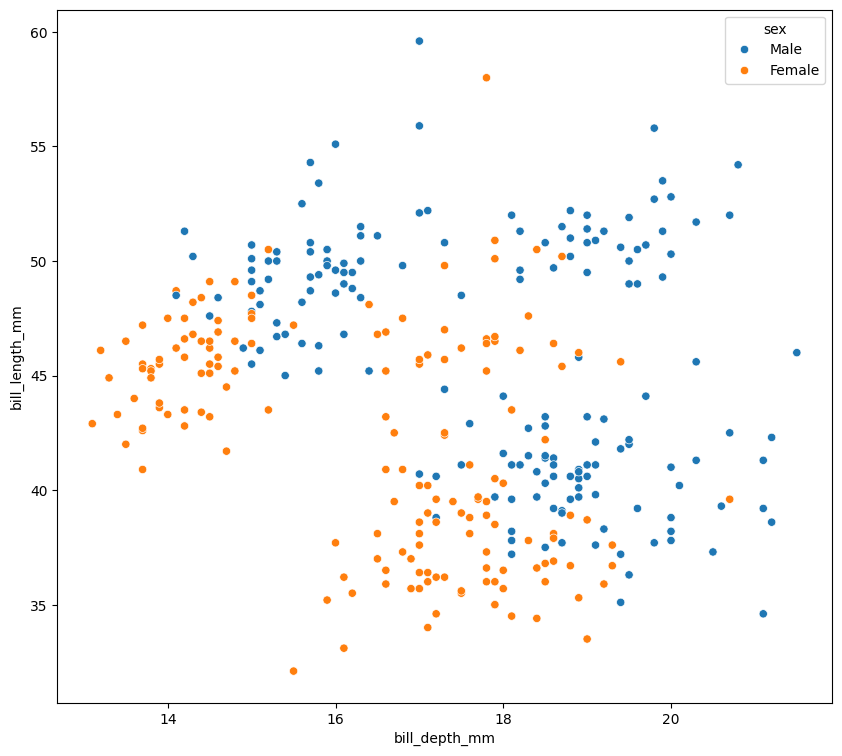

In [30]:
plt.figure(figsize=(10,9))
sns.scatterplot(x='bill_depth_mm',y='bill_length_mm',hue='sex',data=pg)
plt.show()

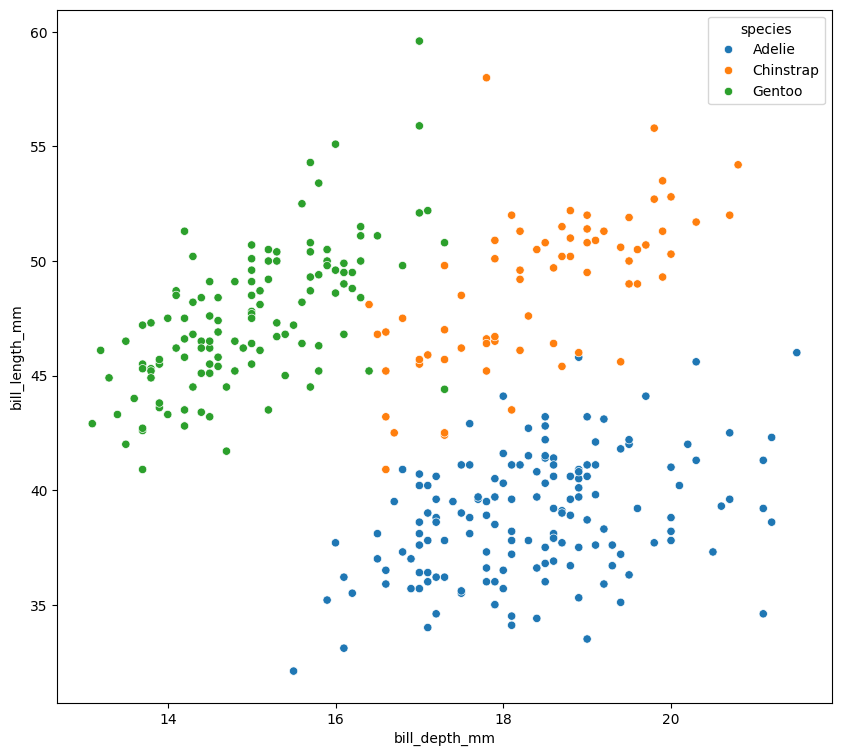

In [31]:
plt.figure(figsize=(10,9))
sns.scatterplot(x='bill_depth_mm',y='bill_length_mm',hue='species',data=pg)
plt.show()

In [32]:
pg.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

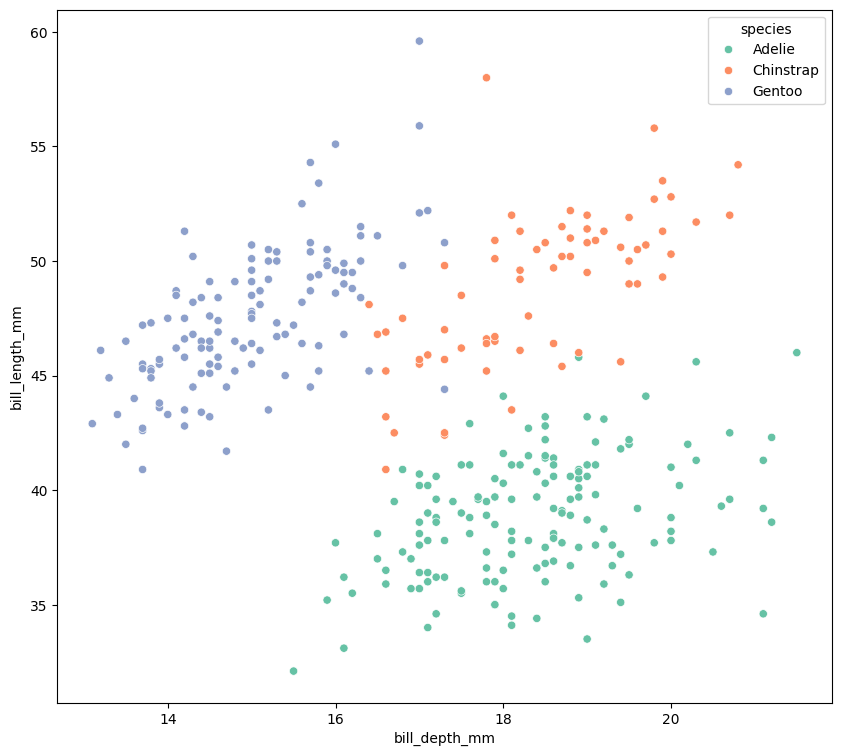

In [35]:
plt.figure(figsize=(10,9))
sns.scatterplot(x='bill_depth_mm',y='bill_length_mm',hue='species',data=pg,palette='Set2')
plt.show()

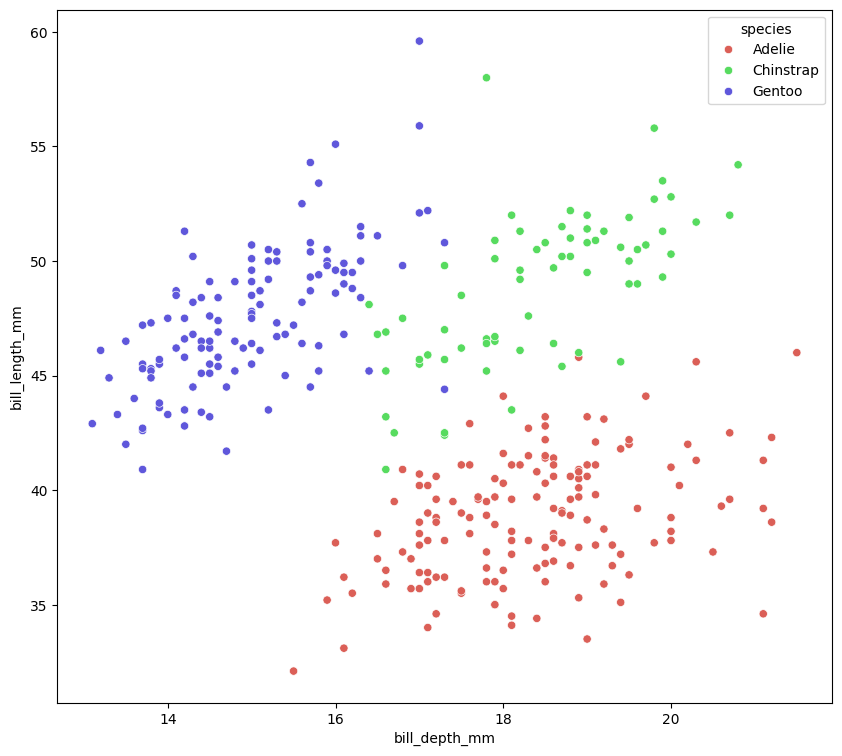

In [39]:
plt.figure(figsize=(10,9))
sns.scatterplot(x='bill_depth_mm',y='bill_length_mm',hue='species',data=pg,palette='hls')
plt.show()

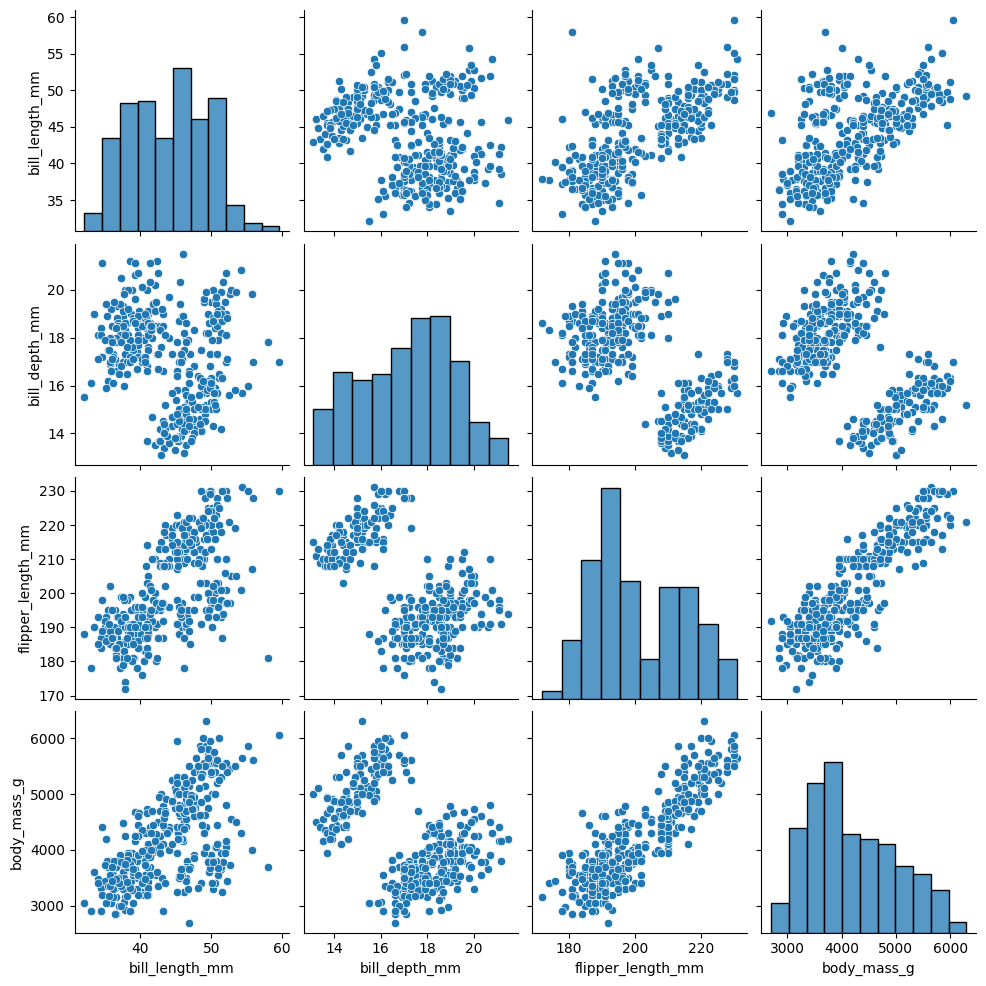

In [36]:
sns.pairplot(pg)

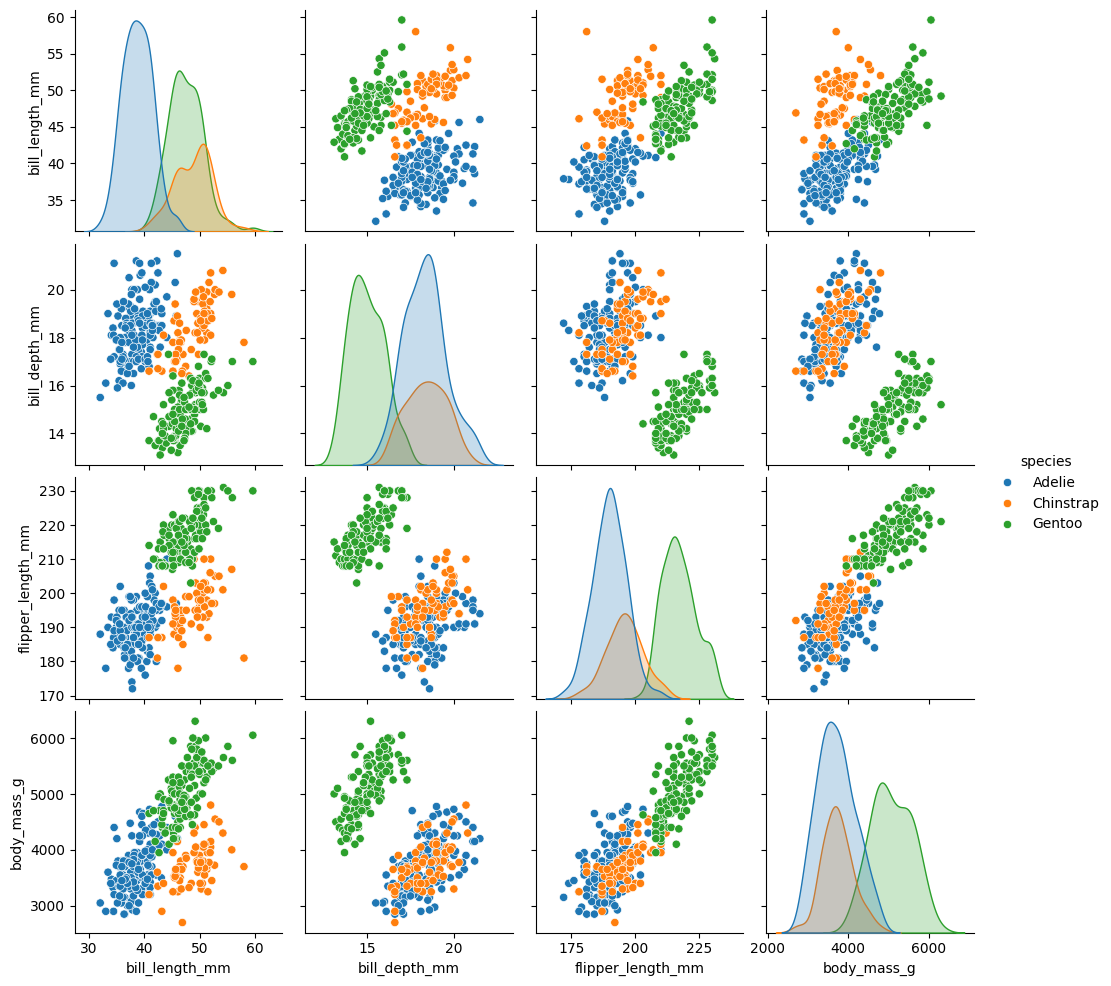

In [40]:
sns.pairplot(pg,hue='species')

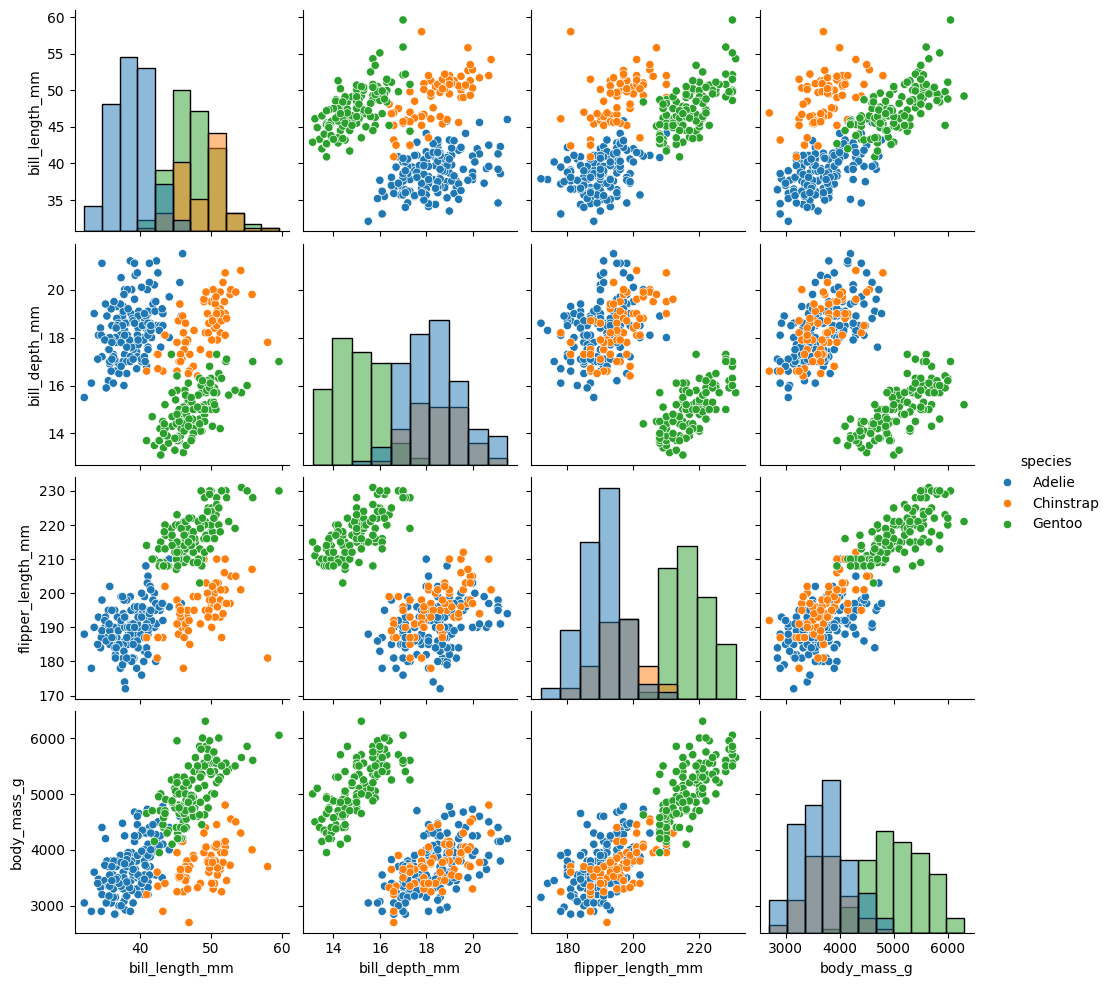

In [43]:
sns.pairplot(pg,hue='species',diag_kind='hist')
plt.show()

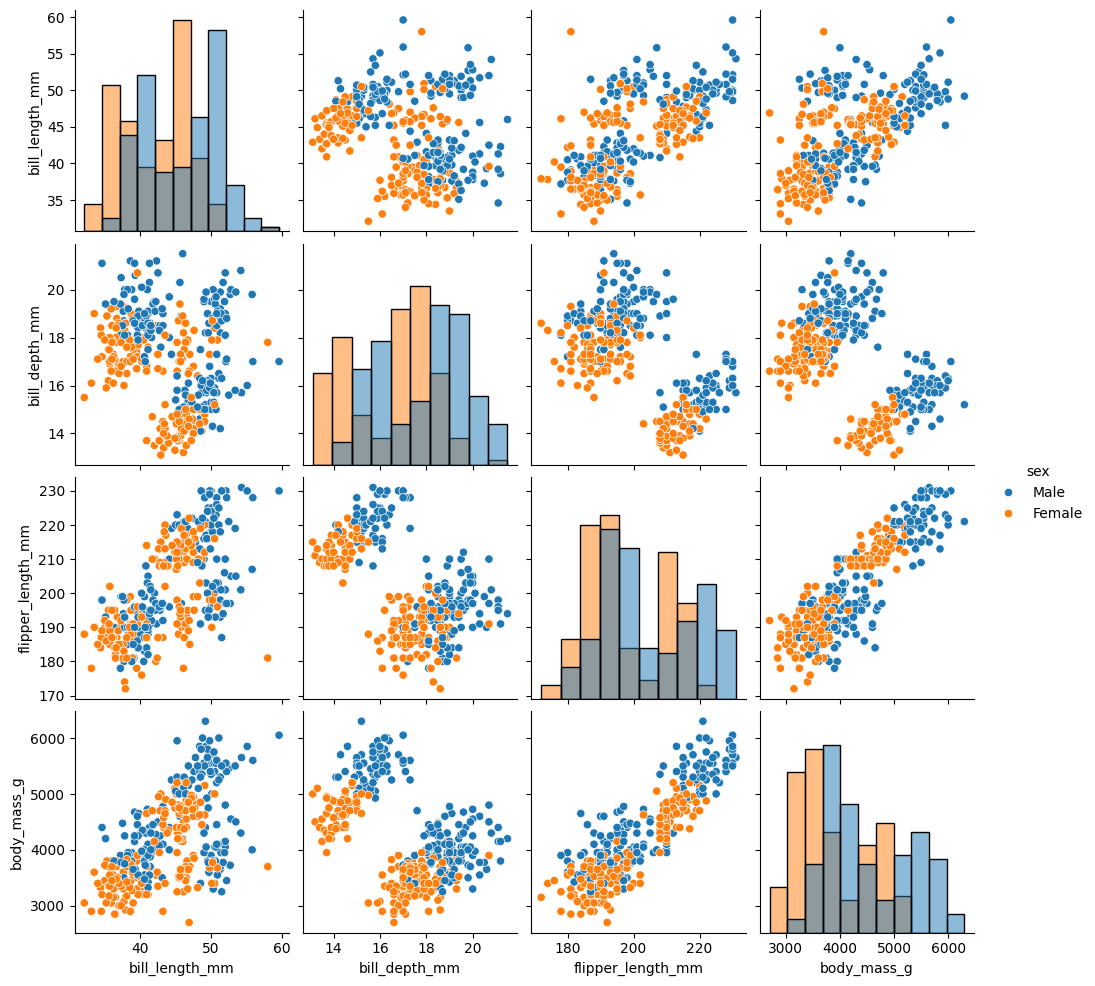

In [44]:
sns.pairplot(pg,hue='sex',diag_kind='hist')
plt.show()

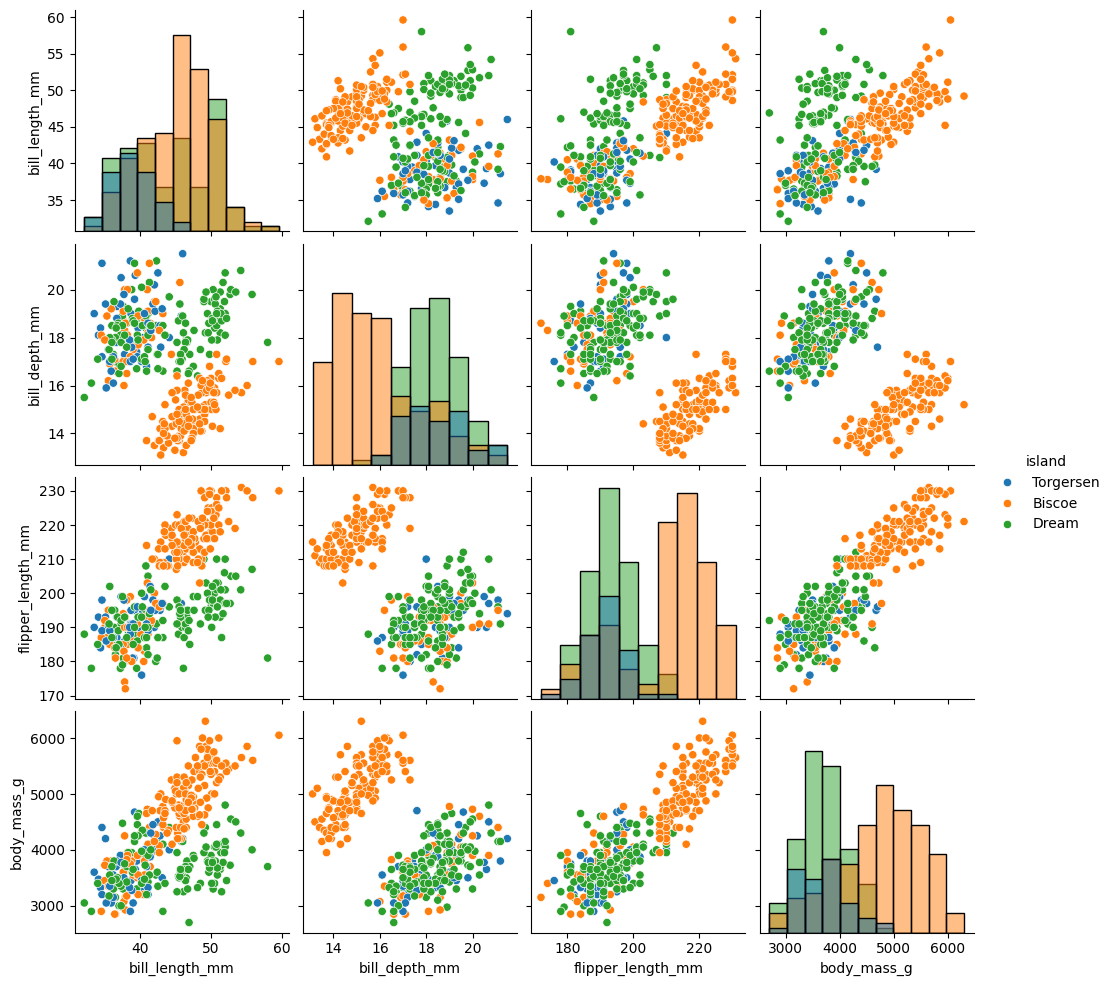

In [45]:
sns.pairplot(pg,hue='island',diag_kind='hist')
plt.show()

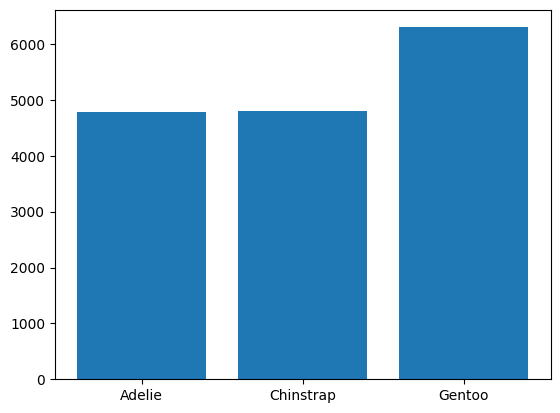

In [46]:
plt.bar(pg['species'],pg['body_mass_g'])
plt.show()

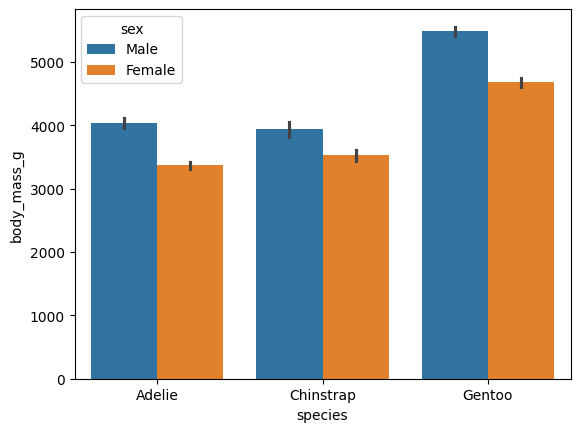

In [49]:
sns.barplot(x='species',y='body_mass_g',data=pg,hue='sex')
plt.show()

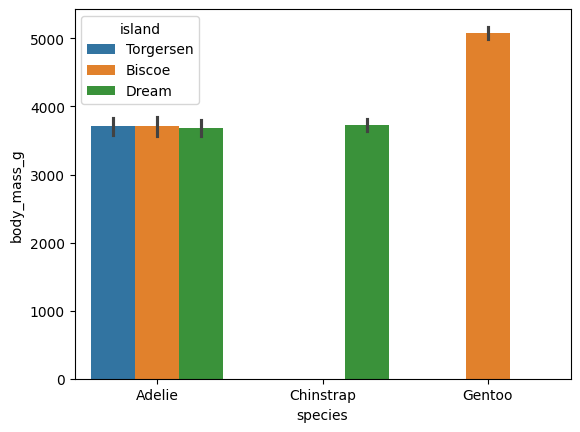

In [50]:
sns.barplot(x='species',y='body_mass_g',data=pg,hue='island')
plt.show()

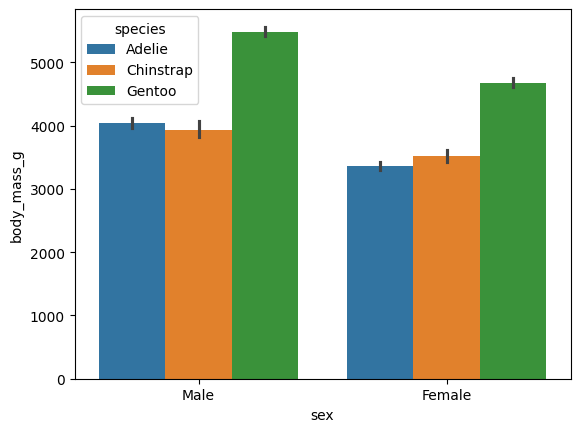

In [51]:
sns.barplot(x='sex',y='body_mass_g',data=pg,hue='species')
plt.show()

In [53]:
## This is called panda series

species_mean = pg.groupby('species')['body_mass_g'].mean()
species_mean

,body_mass_g
species,
Adelie,3700.662252
Chinstrap,3733.088235
Gentoo,5076.016260


In [54]:
print(species_mean.index)

Index(['Adelie', 'Chinstrap', 'Gentoo'], dtype='object', name='species')


In [55]:
print(species_mean.values)

[3700.66225166 3733.08823529 5076.01626016]


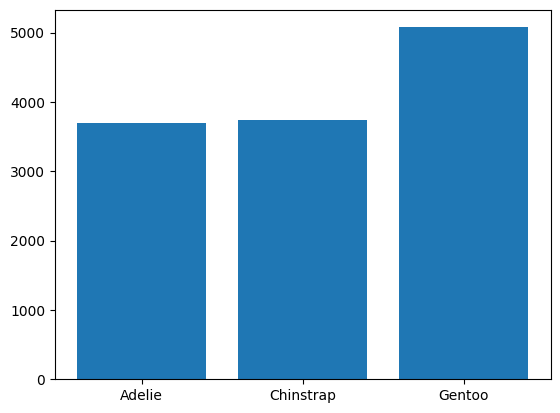

In [56]:
plt.bar(species_mean.index,species_mean.values)
plt.show()

In [57]:
### you can use count, median, max, min instead of mean


species_max = pg.groupby('species')['body_mass_g'].max()
species_max

,body_mass_g
species,
Adelie,4775.0
Chinstrap,4800.0
Gentoo,6300.0


<BarContainer object of 3 artists>

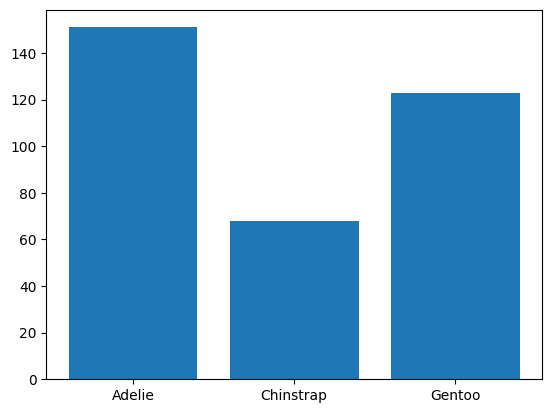

In [59]:
plt.bar(pg.groupby('species')['body_mass_g'].count().index,pg.groupby('species')['body_mass_g'].count().values)

<Axes: xlabel='species', ylabel='body_mass_g'>

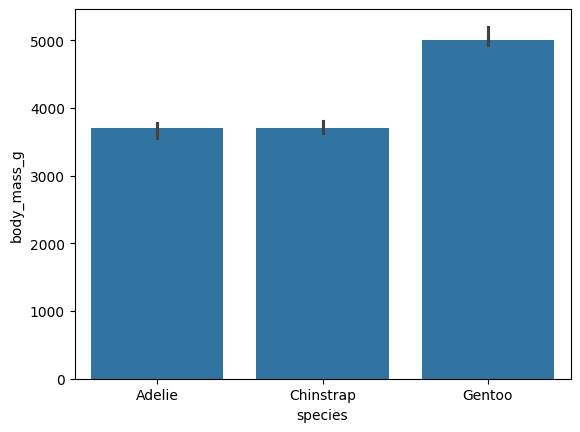

In [61]:
sns.barplot(x='species',y='body_mass_g',data=pg,estimator=np.median)

<Axes: xlabel='species', ylabel='body_mass_g'>

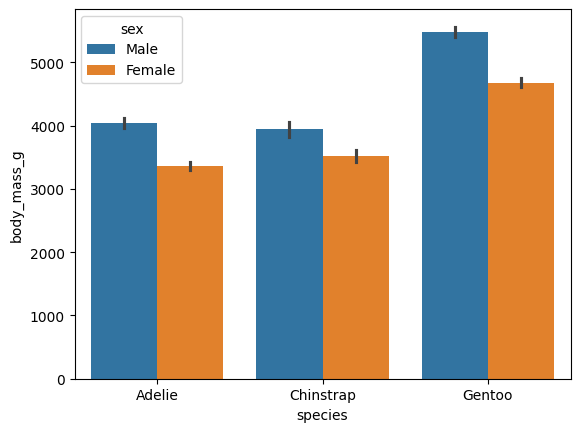

In [62]:
sns.barplot(x='species',y='body_mass_g',data=pg,hue='sex')

In [63]:
species_sex_grouped = pg.groupby(['species','sex'])['body_mass_g'].mean()
species_sex_grouped

species    sex   
Adelie     Female    3368.835616
           Male      4043.493151
Chinstrap  Female    3527.205882
           Male      3938.970588
Gentoo     Female    4679.741379
           Male      5484.836066
Name: body_mass_g, dtype: float64

In [64]:
species_sex_grouped = pg.groupby(['species','sex'])['body_mass_g'].mean().unstack()
species_sex_grouped

sex,Female,Male
species,,
Adelie,3368.835616,4043.493151
Chinstrap,3527.205882,3938.970588
Gentoo,4679.741379,5484.836066


<Axes: xlabel='species'>

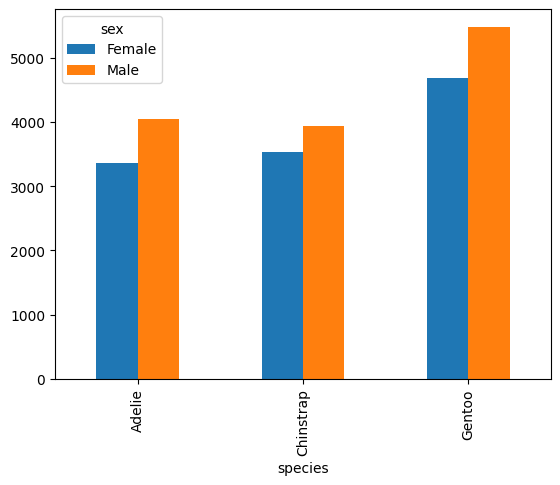

In [65]:
species_sex_grouped.plot(kind='bar')

<Axes: ylabel='Frequency'>

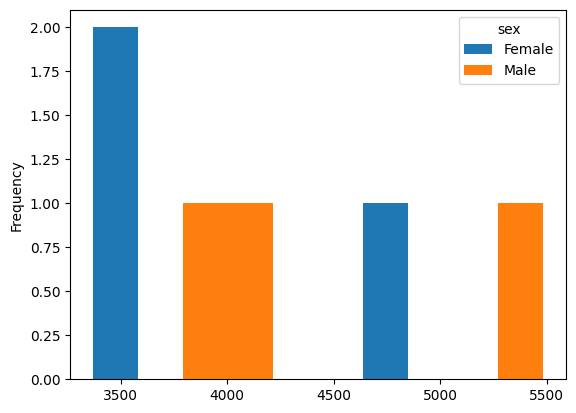

In [69]:
species_sex_grouped.plot(kind='hist')

<Axes: xlabel='species', ylabel='body_mass_g'>

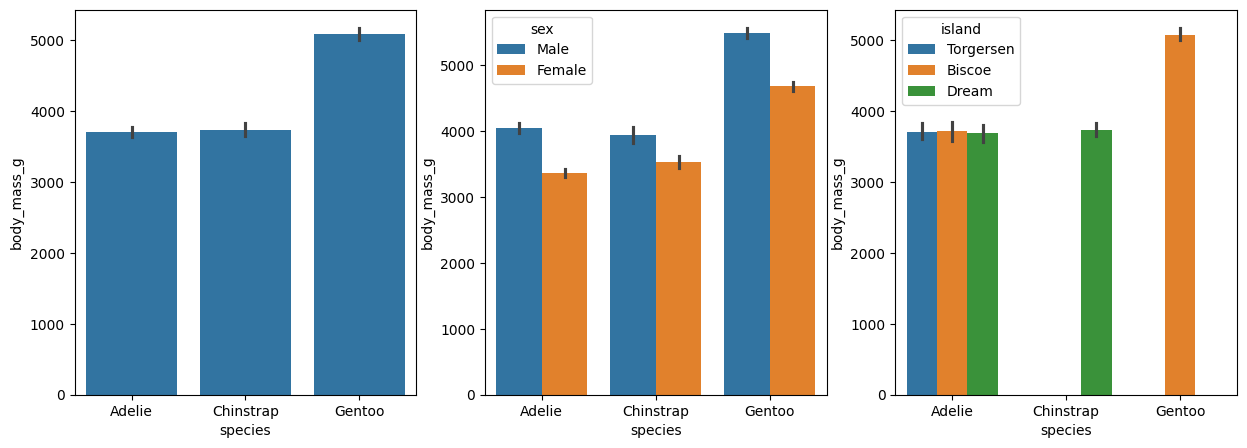

In [85]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='species',y='body_mass_g',data=pg,ax=axes[0])
sns.barplot(x='species',y='body_mass_g',hue='sex',ax=axes[1],data=pg)
sns.barplot(x='species',y='body_mass_g',hue='island',ax=axes[2],data=pg)

# PIE GRAPH

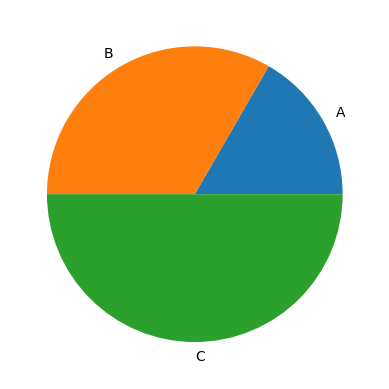

In [86]:
category=['A','B','C']
values=[10,20,30]
plt.pie(values,labels=category)
plt.show()

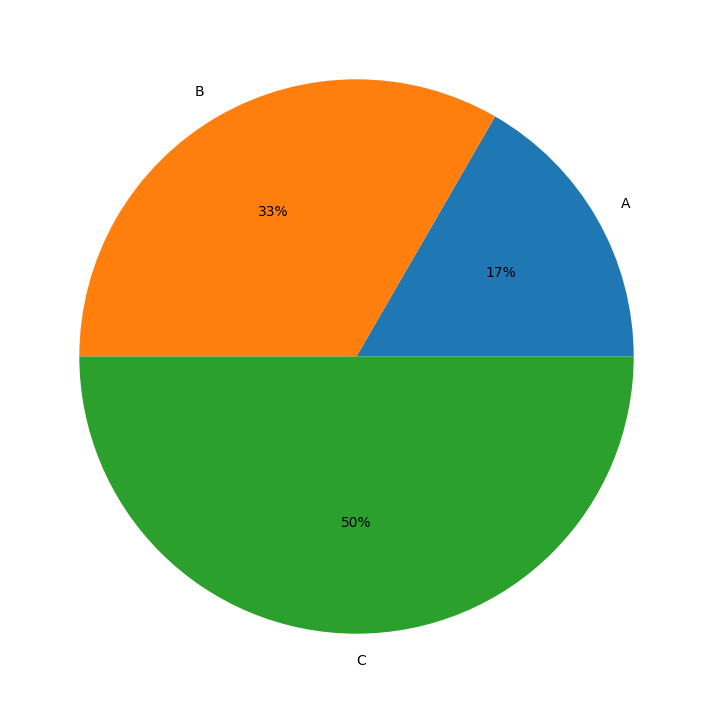

In [101]:
plt.figure(figsize=(10,9))
category=['A','B','C']
values=[10,20,30]
labels=['A','B','C']
plt.pie(values,labels=category,autopct='%1.0f%%')
plt.show()

In [ ]:
plt.figure(figsize=(10,9))
category=['A','B','C']
values=[10,20,30]
plt.pie(values,labels=category,autopct='%1.0f%%')
plt.show()

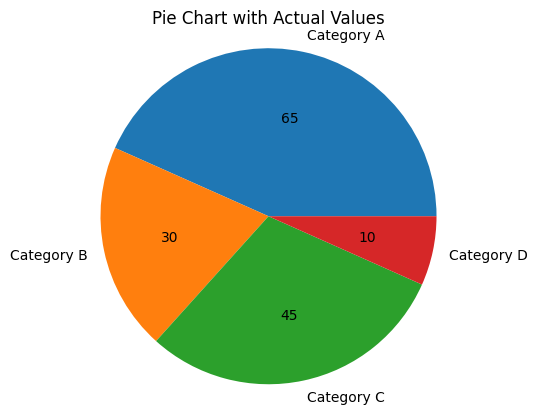

In [100]:
import matplotlib.pyplot as plt

sizes = [65, 30, 45, 10]
labels = ['Category A', 'Category B', 'Category C', 'Category D']

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{v:d}'.format(v=val) # Display only the value
    return my_format

plt.pie(sizes, labels=labels, autopct=autopct_format(sizes))
plt.axis('equal') # Ensures the pie chart is circular
plt.title('Pie Chart with Actual Values')
plt.show()

([<matplotlib.patches.Wedge at 0x7f9aa824af00>,
 [Text(-1.1999999999999955, -1.049073360044697e-07, 'A'),
  Text(0.7778177173879477, -0.7778172012223713, 'B'),
  Text(0.7778174453921319, 0.7778174732182725, 'C')],
 [Text(-0.6999999999999974, -6.119594600260732e-08, '50.0%'),
  Text(0.4242642094843351, -0.42426392793947526, '25.0%'),
  Text(0.424264061122981, 0.42426407630087587, '25.0%')])

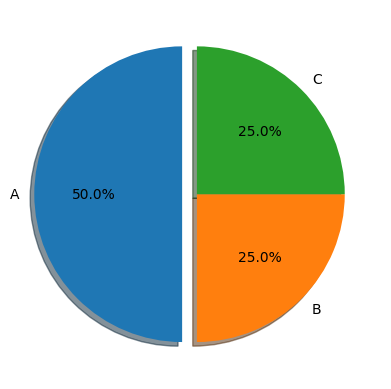

In [102]:
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
labels = ['A', 'B', 'C']
sizes = [50,25,25]
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)